In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import stats

In [2]:
sea_ice_csv = "../Resources/Arctic_Sea_Ice_Extent.csv"

sea_ice_data = pd.read_csv(sea_ice_csv)
sea_ice_data

,Date,MillionSqKm
0,10/26/78,10.231
1,10/28/78,10.420
2,10/30/78,10.557
3,11/1/78,10.670
4,11/3/78,10.777
...,...,...
12746,3/27/18,14.256
12747,3/28/18,14.302
12748,3/29/18,14.238
12749,3/30/18,14.232


In [3]:
sea_ice_data.columns

Index(['Date', 'MillionSqKm'], dtype='object')

In [4]:
sample_count=len(sea_ice_data['Date'].unique())
sample_count_df=pd.DataFrame({'Number of Samples Taken': [sample_count]})
sample_count_df

,Number of Samples Taken
0,12751


In [ ]:
x_axis = sea_ice_data["Date"]
tick_locations=[]
for x in x_axis:
    tick_locations.append(x)
y_axis = sea_ice_data['MillionSqKm']

sea_ice_data.plot(kind='line',legend=False)

plt.title('Arctic Sea Ice Extent 1978-2018')
plt.xlabel('Day(s) from Start of Study')
plt.ylabel('Sea Ice Extent (million sq km)')

plt.tight_layout()

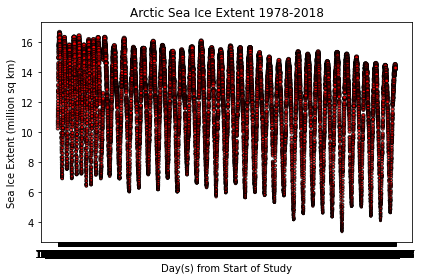

In [5]:
x_axis = sea_ice_data["Date"]
tick_locations=[]
for x in x_axis:
    tick_locations.append(x)
y_axis = sea_ice_data['MillionSqKm']

plt.scatter(
    x_axis,
    y_axis,
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=y_axis,
    alpha=.75)
plt.title('Arctic Sea Ice Extent 1978-2018')
plt.xlabel('Day(s) from Start of Study')
plt.ylabel('Sea Ice Extent (million sq km)')

plt.tight_layout()
plt.show()